In [ ]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/armoutihansen/EEMP2020/main/datasets/income.csv'

df = pd.read_csv(path_to_data)

In [ ]:
# Solution 2
df['age_sq'] = df['age']**2

In [ ]:
# Solution 3
df_sample = df.sample(n=100, random_state=181)
X = df_sample[['age', 'age_sq']]
y = df_sample['income']

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X,y)

print('beta 1:', reg.coef_[0], 'beta 2:', reg.coef_[1])

beta 1: 1886.1434506137127 beta 2: -19.32633165698556


In [ ]:
# Solution 4
beta_1 = []
beta_2 = []

for i in range(100):
    df_sample = df.sample(n=100, random_state=i)
    X = df_sample[['age', 'age_sq']]
    y = df_sample['income']
    reg = LinearRegression().fit(X,y)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])

In [ ]:
# Solution 5
print(np.mean(beta_1))
print(np.mean(beta_2))

2032.346863356569
-20.236612997973


In [ ]:
# Solution 6
print(2000 * 50 - 20 * 50**2)

50000


In [ ]:
# Solution 7
from sklearn.neighbors import KNeighborsRegressor
pred = []
pred2 = []
for i in range(100):
    df_sample = df.sample(n=100, random_state=i)
    X = df_sample[['age', 'age_sq']]
    y = df_sample['income']
    knn = KNeighborsRegressor().fit(X[['age']],y)
    pred.append(knn.predict([[50]])[0])
    lin = LinearRegression().fit(X,y)
    pred2.append(lin.predict([[50,50**2]])[0])


Mean prediction KNN: 49899.08688245381 
Mean prediction LR: 50156.27870783843


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


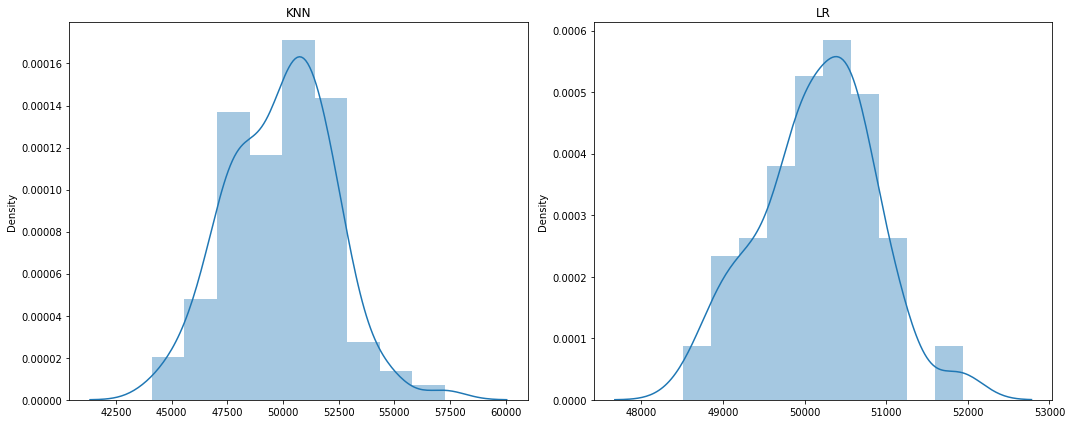

In [ ]:
# Solution 8
print('Mean prediction KNN:', np.mean(pred), '\nMean prediction LR:', np.mean(pred2))

fig, axs = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
sns.distplot(pred, ax=axs[0]).set_title('KNN')
sns.distplot(pred2, ax=axs[1]).set_title('LR')
plt.show();